
# Project: Analyser et explorer les données No-show appointments


## Plan
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Traitement des données</a></li>
<li><a href="#eda">Analyse exploratoire des données</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limites">Limites</a></li>
</ul>

<a id='intro'></a>
## Introduction

![](https://www.sumoscheduler.com/wp-content/uploads/2014/06/no_show.jpg)

> Cet ensemble de données ([voir ici](https://www.kaggle.com/datasets/joniarroba/noshowappointments)) recueille des informations provenant de 100 000 rendez-vous médicaux au Brésil et se concentre sur la question de savoir si les patients se présentent ou non à leur rendez-vous. Un certain nombre de caractéristiques du patient sont incluses dans chaque ligne.
>- 'ScheduledDay' nous indique le jour de quel jour le patient a fixé son rendez-vous.
>- 'Neighborhood' (quartier) indique la localisation de l'hôpital.
>- 'Scholarship' indique si le patient est ou non inscrit à l'aide sociale brésilienne programme brésilien Bolsa Família.
>- La dernière colonne ('No-show') indique "Non" si le patient s'est présenté à son rendez-vous, et " Oui " s'il ne s'est pas présenté.

> Dans ce projet nous allons repondre aux questions suivantes:
>- Quel est la proportion des patients qui ne se sont pas présentés aux rendez-vous ?
>- Quel est le nombre de personnes qui ont bénéficiées de l'aide sociale ?
>- Quel est la proportion des hommes et des femmes?
>- Quel est l'effectif des non presents aux rendez-vous par sexe?
>- Quel est l'effectif des non presents aux rendez-vous qui ont recu une bourse?
>- Quel est la proportion des patients ayant reçu 1 ou plusieurs SMS par non presenté?
>- Qui des personnes atteintes des malidies d'hypertension, de diabète et d'alcoolisme ont le plus honoreux à leur rendez-vous?

In [1]:
# Chargement des librairies necessaires pour notre travail

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Traitement des données


### Caractéristiques générales

In [2]:
#Importation des données
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
#Visualisation des premières observations
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Visualisation des dernières observations
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
#Dimension de la base
df.shape

(110527, 14)

In [6]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#Nombre de valeur unique de chaque variable
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> **Remarque**: La variable Handicap est censé être une variable binaire, elle dit si vrai ou faux le passion est handicapé, elle devrait donc avoir deux valeurs uniques, mais nous constatons qu'elle a plus de 2 valeurs uniques (5 valeurs uniques plus précisement). Ne sachant pas la modalité d'appartenance réel des autres modalités qui se sont ajoutées, nous allons dans la suite supprimé cette variable.

In [8]:
#Nombre de ligne dupliqué
df.duplicated().sum()

0

> **Remarque**: Notre base de données contient 110527 observations et 14 variables. Après observation du type de chaque variable on constate que la variable "PatientId" doit être transformé en type entier, les variables "ScheduledDay" et "AppointmentDay" en type date et les variables 'Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received' en type string car ce sont des variables binaires. Il est aussi a noté que notre base ne contient pas de valeurs manquantes, ni de lignes dupliqués. Par ailleurs la variable 'Handicap' sera supprimé pour des raisons évoquées ci-dessus.

### Nettoyage des données

In [9]:
#Traduction des variables en francais

df.rename(columns={'PatientId':'id_patient', 'AppointmentID':'id_rendez_vous', 'Gender':'sexe', 'ScheduledDay':'jour_prevu', 
 'AppointmentDay':'jour_rendez_vous', 'Age':'age', 'Neighbourhood':'quartier', 'Scholarship':'bourse', 
 'Hipertension':'hypertension', 'Diabetes':'diabete', 'Alcoholism':'alcoolisme', 'Handcap':'handicap', 
 'SMS_received':'sms_recu', 'No-show':'non_present'}, inplace=True)

In [10]:
#Convertir les colonnes du type int
df['id_patient'] = df['id_patient'].astype(int)

In [11]:
#Convertir les colonnes du type date
df['jour_prevu'] = pd.to_datetime(df['jour_prevu'])
df['jour_rendez_vous'] = pd.to_datetime(df['jour_rendez_vous'])

In [12]:
#convertir les colonnes du types objet
binaire = ['bourse', 'hypertension', 'diabete', 'alcoolisme', 'handicap', 'sms_recu']
for var in binaire:
    df[var] = df[var].astype(object)

In [13]:
#vérification
df.dtypes

id_patient                        int32
id_rendez_vous                    int64
sexe                             object
jour_prevu          datetime64[ns, UTC]
jour_rendez_vous    datetime64[ns, UTC]
age                               int64
quartier                         object
bourse                           object
hypertension                     object
diabete                          object
alcoolisme                       object
handicap                         object
sms_recu                         object
non_present                      object
dtype: object

In [14]:
#Renommer les modalités de variables binaires
df['non_present'] = df['non_present'].map({'No': 'Non', 'Yes':'Oui'})
for var in binaire:
    df[var] = df[var].map({0:'Faux', 1:'Vrai'})

In [15]:
#Supression de la variable "handicap"
df.drop('handicap', axis = 1, inplace=True)

In [16]:
#Vérification
df.head()

,id_patient,id_rendez_vous,sexe,jour_prevu,jour_rendez_vous,age,quartier,bourse,hypertension,diabete,alcoolisme,sms_recu,non_present
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,Faux,Vrai,Faux,Faux,Faux,Non
1,-2147483648,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,Faux,Faux,Faux,Faux,Faux,Non
2,-2147483648,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,Faux,Faux,Faux,Faux,Faux,Non
3,-2147483648,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,Faux,Faux,Faux,Faux,Faux,Non
4,-2147483648,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,Faux,Vrai,Vrai,Faux,Faux,Non


<a id='eda'></a>
## Analyse exploratoire des données



### Question 1:Quel est la proportion des patients qui ne se sont pas présentés aux rendez-vous ?

In [17]:
#Proportion des oui et non pour la variable non_present
df['non_present'].value_counts()*100/df.shape[0]

Non    79.806744
Oui    20.193256
Name: non_present, dtype: float64

>Dans la suite de notre travail nous allons utiliser trois fois la représentation graphique sous forme de camenbert. Pour éviter de répéter les codes, nous créons la fonction **graph_pie** qui répresente le camenbert en lui fournissant les données et le titre du graphique. Ainsi nous allons appeller cette fonction chaque fois que nous allons représenter un camenbert. Le choix de ce graphique pour présenter nos résultats est cette possibilité qu'il nous donne dans la visualisation claire de la part de chaque modalité de notre variable.

In [18]:
#Creation de la fonction qui trace le camnbert

def graph_pie(data, title):
    labels = 'Non', 'Oui'
    explode = (0, 0.1)  # only "explode" the 2nd slice 

    fig1, ax1 = plt.subplots()
    ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(title)

    return plt.show()

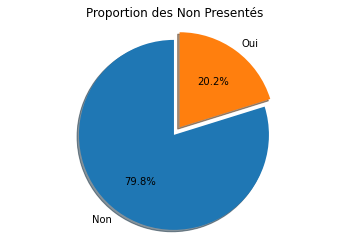

In [19]:
data = df['non_present'].value_counts()
graph_pie(data, "Proportion des Non Presentés")

> Sur les 110527 patients qui ont eu un rendez-vous médical au Brésil seul 20,2% n'ont pas répondu présent a leur rendez-vous.

### Question 2 :Quel est le nombre de personnes qui ont bénéficiées de l'aide sociale ?

In [20]:
#Proportion des personnes qui ont recu l'aide sociale 
df['bourse'].value_counts()

Faux    99666
Vrai    10861
Name: bourse, dtype: int64

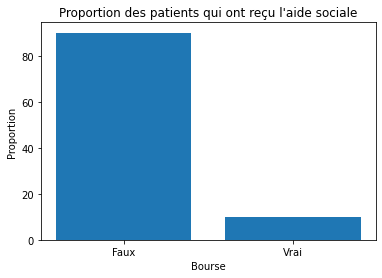

In [21]:
#Visualisation
data = df['bourse'].value_counts()*100/df.shape[0]
labels = ['Faux', 'Vrai']
plt.xticks(range(len(data)), labels)
plt.xlabel('Bourse')
plt.ylabel('Proportion')
plt.title("Proportion des patients qui ont reçu l'aide sociale")
plt.bar(range(len(data)), data) 
plt.show()

> Près de 90 % des patients enregistrés n'ont pas reçu l'aide sociale.

### Question 3 :Quel est la proportion des hommes et des femmes?

In [22]:
#Proportion par sexe
df['sexe'].value_counts()*100/df.shape[0]

F    64.997693
M    35.002307
Name: sexe, dtype: float64

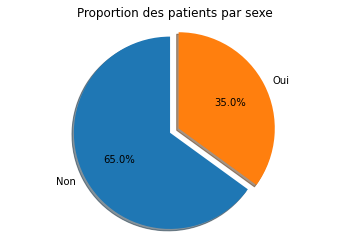

In [23]:
data = df['sexe'].value_counts()
graph_pie(data, "Proportion des patients par sexe")

> 65% des patients ayant pris un rendez-vous médical sont des femmes.

### Question 4 :Quel est l'effectif des non presents aux rendez-vous par sexe?

In [24]:
#Effectif des non présent par sexe
df.groupby('sexe')['non_present'].value_counts()

sexe  non_present
F     Non            57246
      Oui            14594
M     Non            30962
      Oui             7725
Name: non_present, dtype: int64

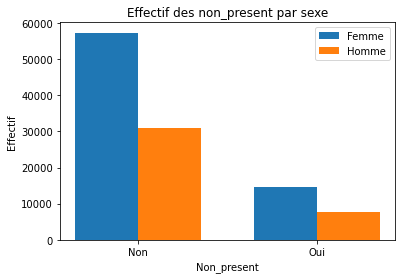

In [25]:
#Visualisation
N = 2
sex_np = df.groupby('sexe')['non_present'].value_counts()
femme = (sex_np[0], sex_np[1])
mascu = (sex_np[2], sex_np[3])

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, femme, width, label='Femme')
plt.bar(ind + width, mascu, width,
    label='Homme')
plt.xlabel('Non_present')
plt.ylabel('Effectif')
plt.title('Effectif des non_present par sexe')

plt.xticks(ind + width / 2, ('Non', 'Oui',))
plt.legend(loc='best')
plt.show()

> La majorité des personnes qui se sont présentées à leur rendez-vous (modalité 'Non') sont des femmes (57246 pour les femmes contre 30962 pour les hommes. Voir graphique). Apparement les femmes se soucies plus de leur santé que les hommes. L'intérêt de ce graphique est de faire une comparaison directe des effectifs des Hommes et des femmes pour chaque modalité de la variable 'Non_present'.

### Question 5 :Quel est l'effectif des non presents aux rendez-vous qui ont recu une bourse?

In [26]:
#effectif des non_present qui ont reçu l'aide sociale
bour_np = df.groupby('bourse')['non_present'].value_counts()
bour_np

bourse  non_present
Faux    Non            79925
        Oui            19741
Vrai    Non             8283
        Oui             2578
Name: non_present, dtype: int64

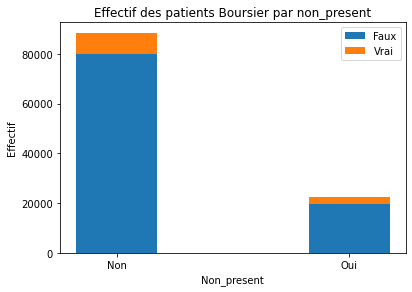

In [27]:
#Visualisation
N = 2
bour_faux = (bour_np[0], bour_np[1])
bour_vrai = (bour_np[2], bour_np[3])
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])
ax.bar(ind, bour_faux, width)
ax.bar(ind, bour_vrai, width,bottom=bour_faux)
ax.set_xlabel('Non_present')
ax.set_ylabel('Effectif')
ax.set_title('Effectif des patients Boursier par non_present')
ax.set_xticks(ind, ('Non', 'Oui'))
ax.legend(labels=['Faux', 'Vrai'])
plt.show()

> La majorité des personnes qui se sont présentées à leur rendez-vous médical (Modalité 'Non') sont des non bénificiaire de l'aide sociale (Voir graphique). 

### Question 6 :Quel est la proportion des patients ayant recu 1 ou plusieurs SMS par non presenté?

In [28]:
#Effectif des patients ayant reçu un ou plusieurs sms par rapport la variable non_present
sms = df.query('sms_recu == "Vrai"')['non_present']
sms.value_counts()*100/sms.shape[0]

Non    72.425455
Oui    27.574545
Name: non_present, dtype: float64

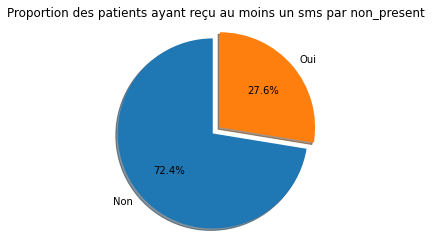

In [29]:
data = df.query('sms_recu == "Vrai"')['non_present'].value_counts()
graph_pie(data, "Proportion des patients ayant reçu au moins un sms par non_present")

> Des patients qui ont reçu un ou plusieurs sms, seul 27,6% n'ont pas répondu présent au rendez-vous contre 72,4% qui se sont présentés. Il semblerai que le fait de recevoir un ou plusieurs messages de rappel, insite vraiment les patients à se présentrer à leur rendez-vous.

### Question 7:  Qui des personnes atteintes des malidies d'hypertension, de diabète et d'alcoolisme ont le plus honoreux à leur rendez-vous?

In [30]:
#selection des patients qui ont repondus present à leur rendez-vous suivant les varibles 
#'hypertension', 'diabete' et 'alcoolisme'
maladie = df.query('non_present == "Non"').loc[:,'hypertension':'alcoolisme']

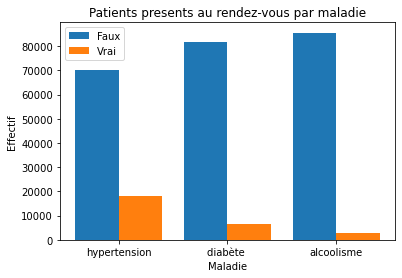

In [31]:
#Visalisation
hyper = maladie['hypertension'].value_counts()
diab = maladie['diabete'].value_counts()
alco = maladie['alcoolisme'].value_counts()

X = ['hypertension','diabète ','alcoolisme']
faux = [hyper[0], diab[0], alco[0]]
vrai = [hyper[1], diab[1], alco[1]]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, faux, 0.4, label = 'Faux')
plt.bar(X_axis + 0.2, vrai, 0.4, label = 'Vrai')
  
plt.xticks(X_axis, X)
plt.xlabel("Maladie")
plt.ylabel("Effectif")
plt.title("Patients presents au rendez-vous par maladie")
plt.legend()
plt.show()

> Des personnes qui se sont présentées à leur rendez-vous et qui sont atteintes des maladies comme l'hypertention, le diabète ou l'alcoolisme, ce sont ceux qui sont souffre d'hypertension qui ont le plus repondu present à la leur rendez-vous à l'opposé des alcoolismes.

<a id='conclusions'></a>
## Conclusions


> A la suite des questions que nous nous sommes posées nous pouvons conclure ainsi:
>- Près de 80% des patients se sont présentés à leur rendez-vous.
>- De ceux qui ont eu un rendez-vous, la majorité sont des femmes.
>- Les femmes semble se souciée plus de leur santé que les hommes.
>- Peu de personnes reçoivent de l'aide sociale.
>- Le fait de recevoir ou non un message de l'hôpital semble influencer la décision de se presenter ou pas au rendez vous medical.
>- Les personnes souffrant d'hypertension se presente le plus à leur rendez-vous que des personnes atteintes du diabète ou d'alcoolisme.

<a id='limites'></a>
## Limites

>Nous sommes conscients que notre analyse serait d’autant plus raffinée si la disponibilité et la structure de nos données nous permettaient d’explorer certains éléments. Les limites de notre analyse sont les suivantes:
>- La qualité des données ne nous a pas permit d'explorer la variable 'handicap'; il serait interessant de voir si l'handicap constitue un frein à la présence ou non d'un rendez-vous médical.
>- Nous n'avons pas pu explorer la variable 'Neighborhood' (quartier) qui indique la localisation de l'hôpital. Il serait aussi intéressant de voir quels sont les hopitaux qui enregistrent le plus de présence au rendez-vous et voir les raisons qui soutendent ces présences, est-ce la qualité de ces hopitaux ? de leurs services...?
>- L'existence d'une variable prenant en compte la distance entre le lieu d'habitation du patient et l'hôpital où il a eu un rendez-vous pouvait nous aider aussi à comprendre la présence ou non au rendez-vous des patients. 